In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('train.csv.zip')
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
!pip install ptitprince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [ ]:
import ptitprince as pt
import matplotlib.pyplot as plt

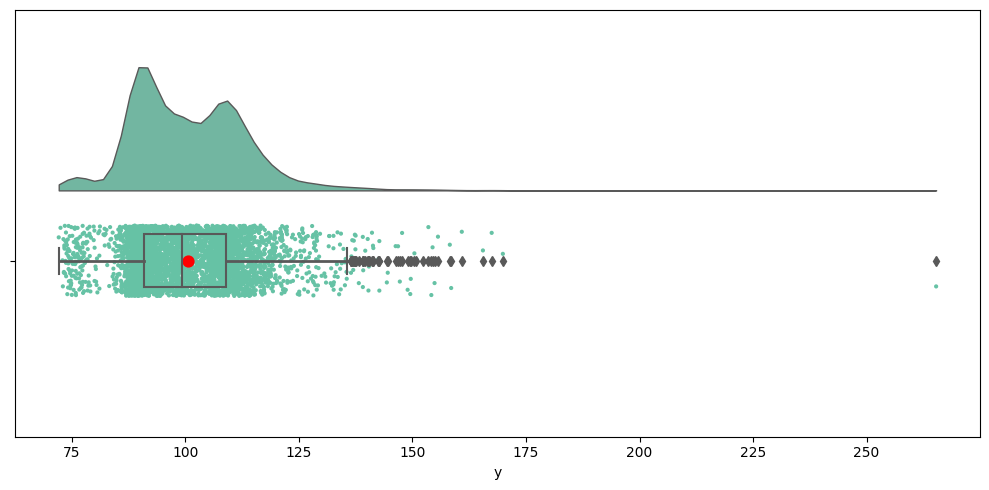

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
pt.RainCloud(ax=ax, y="y", data=df, orient="h", pointplot=True)
fig.tight_layout()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


так нельзя посмотреть информацию о признаках

In [ ]:
columns_x=df.drop(['ID', 'y'],axis=1)
columns_x.shape

(4209, 376)

In [ ]:
tmp = []
for col in columns_x:
    ser = df[col]
    tmp.append({
        'name' : ser.name,
        'dtype' : str(ser.dtype),
        'n_unique' : len(ser.unique()),
        'n_null' : ser.isnull().sum(),
    })
df_categ = pd.DataFrame(tmp)

In [ ]:
df_categ[:4]

,name,dtype,n_unique,n_null
0,X0,object,47,0
1,X1,object,27,0
2,X2,object,44,0
3,X3,object,7,0


In [ ]:
df_categ[df_categ["n_null"]!=0]

,name,dtype,n_unique,n_null


In [ ]:
df_categ['dtype'].unique()

array(['object', 'int64'], dtype=object)

In [ ]:
columns_1_unique = df_categ[df_categ['n_unique']==1].name.values
columns_bool = df_categ[df_categ['n_unique']==2].name.values
columns_other = [col for col in columns_x if not (col in columns_1_unique or col in columns_bool)]
columns_other

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [ ]:
df_categ[df_categ['dtype']=='object']["name"]

0    X0
1    X1
2    X2
3    X3
4    X4
5    X5
6    X6
7    X8
Name: name, dtype: object

In [ ]:
columns_1_unique

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

In [ ]:
cat_cols=df_categ[df_categ['dtype']=='object']["name"]
num_cols=df_categ[df_categ['dtype']=='int64']["name"]
#те знаки, которые имеют 1 уникальное значение, не нужны
num_cols_new=[ele for ele in num_cols if ele not in columns_1_unique ]


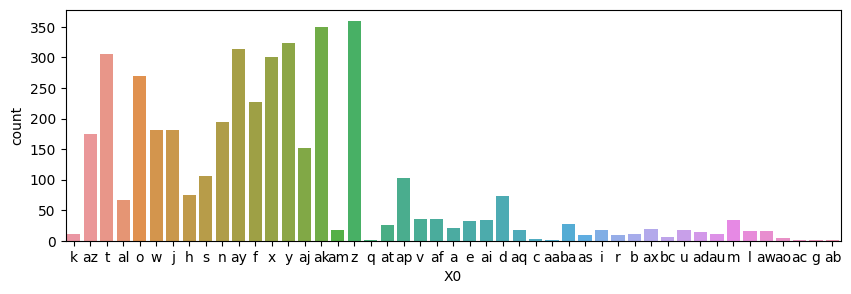

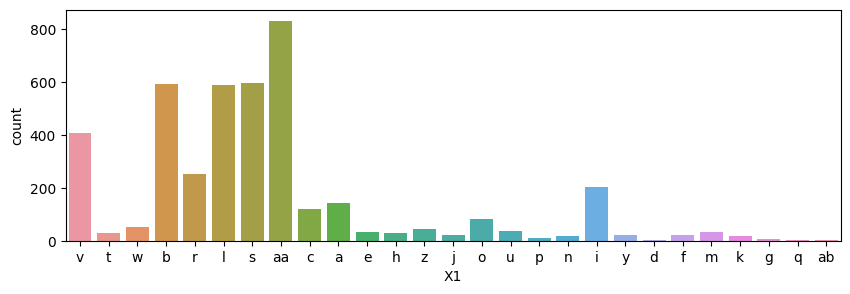

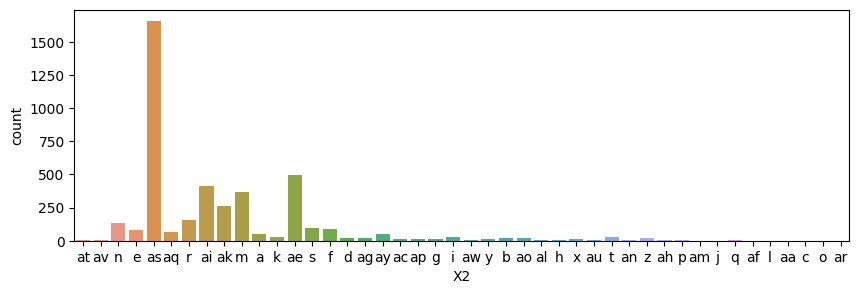

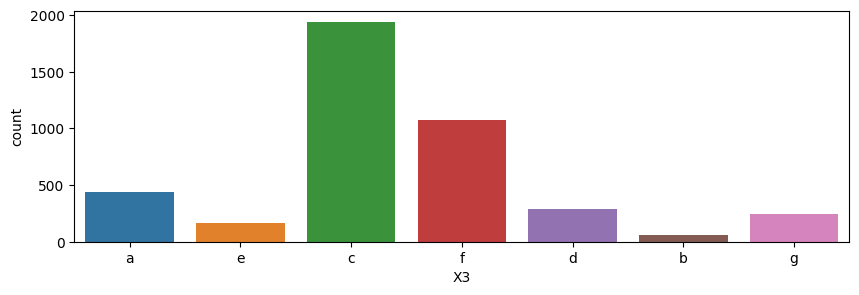

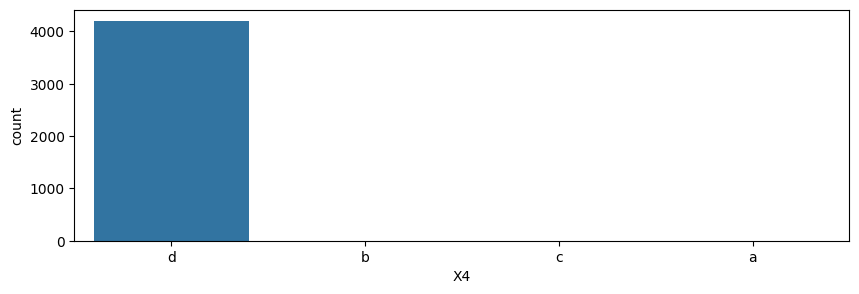

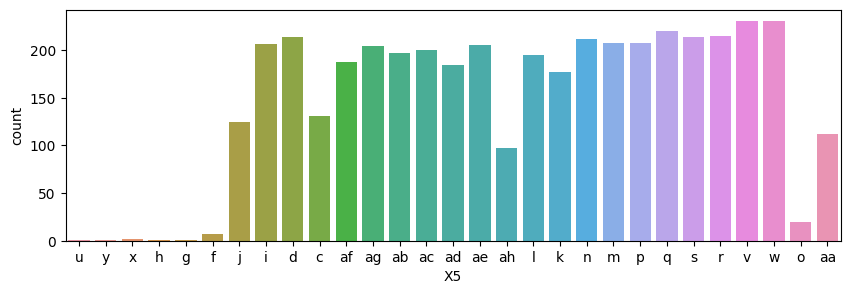

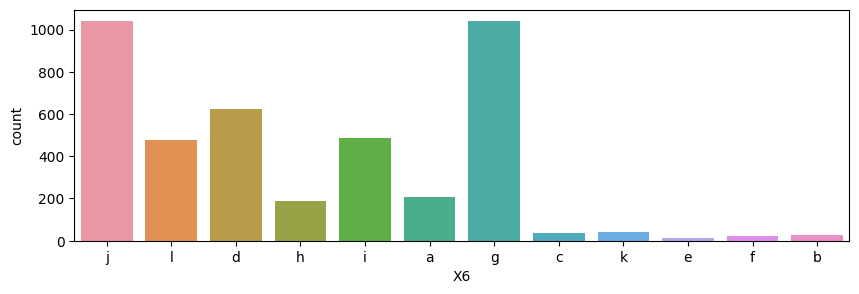

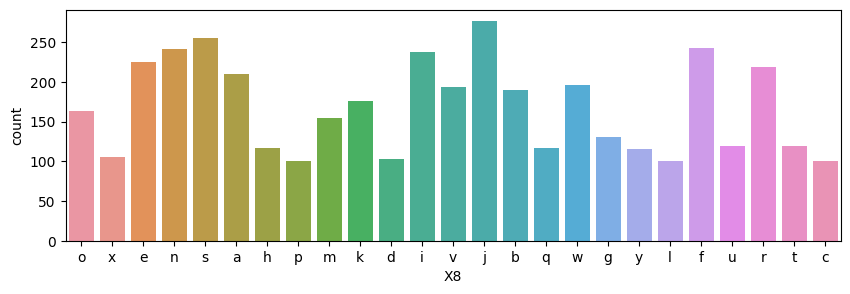

In [ ]:
import  seaborn as sns
for col in cat_cols:
    plt.figure(figsize=(10, 3))
    sns.countplot(data=df, x=col)
    plt.show()

In [ ]:
df['y'].isna().sum()

0

#корелация

In [ ]:
new_df=df[num_cols_new]
new_df["target"]=df["y"]
corr_df=pd.DataFrame(new_df.corr()["target"].sort_values(ascending=False)[:10])
corr_df.style.background_gradient(cmap='Blues')

,target
target,1.000000
X314,0.606005
X261,0.588785
X263,0.379629
X136,0.368177
X275,0.275042
X119,0.272728
X118,0.272728
X51,0.229999
X264,0.228169


In [ ]:
df.drop([1621],axis=0,inplace=True)
df.drop(df[df['X1']=="c"].index,axis=0,inplace=True)

In [ ]:

X = df.drop(['ID', 'y'],axis=1)
y = df["y"]


In [ ]:
X.drop(columns_1_unique,axis=1,inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (3269, 364)
Training Labels Shape: (3269,)
Testing Features Shape: (818, 364)
Testing Labels Shape: (818,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

cat_pipe_ordinal = Pipeline([
    ('encoder', OrdinalEncoder( ))
])

numerical_pipe = Pipeline([
    ('scaler', StandardScaler())
])

preprocessors_ = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_cols_new),
    ('cat', cat_pipe_ordinal, cat_cols)
])

pipeline = Pipeline([
    ('preprocessors', preprocessors_)
])

In [ ]:
X_train = pipeline.fit_transform(X_train) # потом преобразуем  transform
X_test  = pipeline.transform(X_test) # для тестовых - просто transform

In [ ]:
X_train.shape

(3269, 364)

In [ ]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor

In [ ]:
from tqdm import tqdm
plt.rcParams["figure.figsize"] = (10, 3)

#случайного леса.
Алгоритм из $ N$ деревьев, выглядит следующим образом:


Для каждого $n = 1, \dots, N$: <br>
1. Сгенерировать выборку $ X_n$ с помощью бутстрапа; <br>
2. Построить решающее дерево $ b_n$ по выборке $ X_n$: <br>
— по заданному критерию выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки <br>
— дерево строится, пока в каждом листе не более $ n_\text{min}$ объектов или другому критерию останова <br>
— при каждом разбиении сначала выбирается $ m$ случайных признаков из $ n$ исходных,
и оптимальное разделение выборки ищется только среди них.

Так, при построении каждого дерева при созданию нового узла случайным образом выбираем набор признаков для разбиения. Таким образом, мы снизим дисперсию итоговой модели, поскольку уменьшаем скоррелированность деревьев.

Итоговый классификатор имеет вид $ a(x) = \frac{1}{N}\sum_{i = 1}^N b_i(x)$, где $b_i$ - одно из деревьев (базовый алгоритм). Для задачи кассификации мы выбираем класс через правило голосования большинства, а в задаче регрессии — берем средний прогноз.


Для сравнения, посчитаем усредненные смещение и дисперсию для более простого алгоритма (решающего дерева):



In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train.values, X_test, y_test.values,
        loss='mse',
        random_seed=42)

print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average bias: 79.201
Average variance: 78.431


In [ ]:
tree = RandomForestRegressor(random_state=42)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train.values, X_test, y_test.values,
        loss='mse',
        random_seed=42)

print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average bias: 74.781
Average variance: 11.124


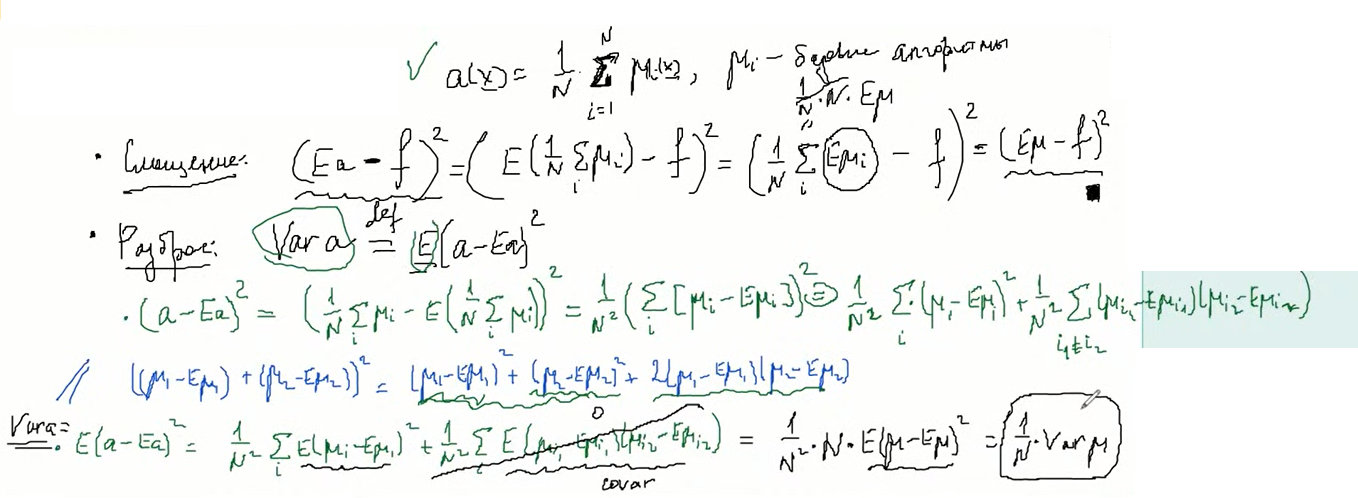

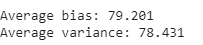

теория работает

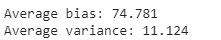

100%|██████████| 49/49 [01:45<00:00,  2.15s/it]


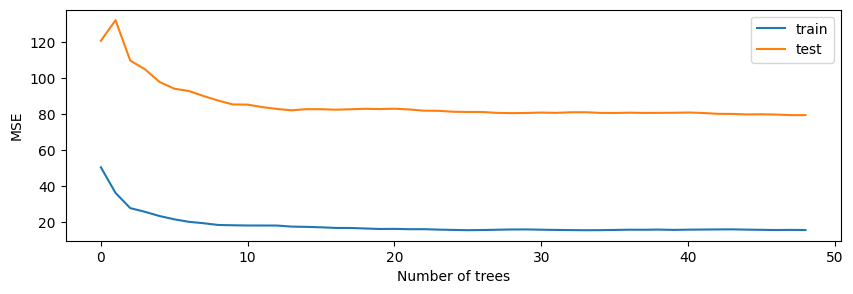

In [ ]:
train_mse, test_mse = [], []
n_trees = 50
from sklearn.metrics import mean_squared_error,r2_score
for i in tqdm(range(1, n_trees)):
    model = RandomForestRegressor(n_estimators=i, random_state=42)
    model.fit(X_train, y_train)
    train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(train_mse, label='train')
plt.plot(test_mse, label='test')
plt.xlabel('number of trees')
plt.ylabel('MSE')
plt.xlabel('Number of trees')
plt.legend();

обично при увеличении n_trees randomforest мoдель не переобучается

In [ ]:
pd.DataFrame({"n_trees": np.arange(49),"MSE": test_mse}).sort_values(by="n_trees").reset_index(drop=True)[11:17]

,n_trees,MSE
11,11,83.925975
12,12,82.884909
13,13,82.157401
14,14,82.763876
15,15,82.756806
16,16,82.475662


зафиксируем n_tree=13

100%|██████████| 29/29 [00:21<00:00,  1.32it/s]


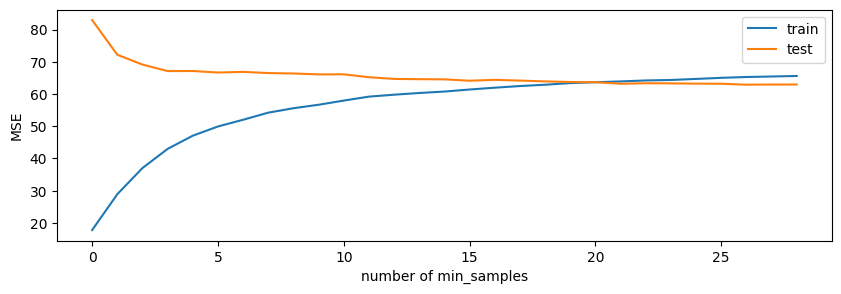

In [ ]:
min_samples_leaf_array = range(1, 30)
train_mse_array = []
test_mse_array = []
for  min_samples_leaf in tqdm(min_samples_leaf_array):
    model = RandomForestRegressor(n_estimators=13, min_samples_leaf=min_samples_leaf, random_state=13)
    model.fit(X_train, y_train)
    train_mse_array.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mse_array.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(train_mse_array, label='train')
plt.plot(test_mse_array, label='test')
plt.xlabel('number of min_samples')
plt.ylabel('MSE')
plt.legend();

зафиксируем min_samples=21

100%|██████████| 7/7 [00:01<00:00,  4.00it/s]


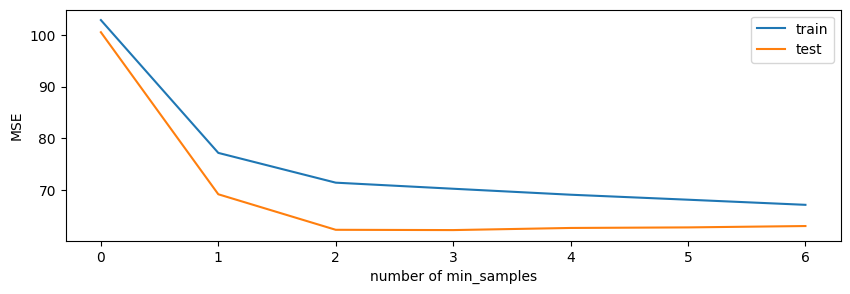

In [ ]:
max_depth_array = range(1, 8)
train_mse_depth = []
test_mse_depth = []
for  max_depth in tqdm(max_depth_array):
    model = RandomForestRegressor(n_estimators=13, min_samples_leaf=21,max_depth=max_depth, random_state=13)
    model.fit(X_train, y_train)
    train_mse_depth.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mse_depth.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(train_mse_depth, label='train')
plt.plot(test_mse_depth, label='test')
plt.xlabel('number of min_samples')
plt.ylabel('MSE')
plt.legend();

In [ ]:
model = RandomForestRegressor(n_estimators=13, min_samples_leaf=19, random_state=13)
model.fit(X_train, y_train)
print(mean_squared_error(y_train, model.predict(X_train)))
print(mean_squared_error(y_test, model.predict(X_test)))

62.875345520244636
63.91391120837635


In [ ]:
model = RandomForestRegressor(n_estimators=13, min_samples_leaf=19,max_depth=4 ,random_state=13)
model.fit(X_train, y_train)
print(mean_squared_error(y_train, model.predict(X_train)))
print(mean_squared_error(y_test, model.predict(X_test)))

70.14531044369348
62.387523126426096


Есть некоторые практически рекомендации по построению случайных лесов: в задачах классификации рекомендуется брать $m = \sqrt{d}$, где $d$ - общее число признаков, и строить дерево до тех пор, пока в каждом листе не останется по одному объекту, а в задаче регрессии принимать $m = d/3$ и строить дерево, пока в листьях не останется по пять объектов.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators =np.arange(1,100,3)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 30, num = 15)]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30],
 'n_estimators': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97])}


In [ ]:
 #Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error',
                              cv = 5, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
rf_random.best_params_

{'n_estimators': 22,
 'min_samples_leaf': 21,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

рекомендация об использовании max_depth на интервале 1-6 правильно

'min_samples_leaf': 21,max_depth угадались

In [ ]:
best=rf_random.best_estimator_

In [ ]:
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

In [ ]:
best.fit(X_train, y_train)

# предсказываем на тестовых данных
y_predict=best.predict(X_test)

# выбираем метрики которые будем оценивать
# в виде словаря
scoring = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}

# используем функцию кросс-валидации

scores = cross_validate(best, # какую модель тестируем
                        X_train, y_train, # на каких данных
                      scoring=scoring,  #на каких метриках
                      # как разбиваем данные при кросс-валидации
                      cv=ShuffleSplit(n_splits=5, random_state=42))


print('Результаты Кросс-валидации')
DF_cv_tree = pd.DataFrame(scores)
display(DF_cv_tree)


print('Ошибка на тестовых данных')
print('MSE: %.1f' % mean_squared_error(y_test,y_predict))
print('RMSE: %.1f' % mean_squared_error(y_test,y_predict,squared=False))

print('R2 : %.4f' %  r2_score(y_test,y_predict))

Результаты Кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.423778,0.004696,0.586520,-58.017062,-5.117591,-55.695877
1,0.411704,0.006393,0.593165,-60.630292,-5.103089,-70.074527
2,0.560445,0.005816,0.400914,-138.112191,-5.252192,-171.236499
3,0.577481,0.006134,0.577640,-66.669146,-5.554305,-41.077219
4,0.993516,0.016542,0.576145,-67.932840,-5.486489,-55.875897


Ошибка на тестовых данных
MSE: 62.8
RMSE: 7.9
R2 : 0.5947


In [ ]:
# Get numerical feature importances
importances = list(best.feature_importances_)
feature_list = list(X.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

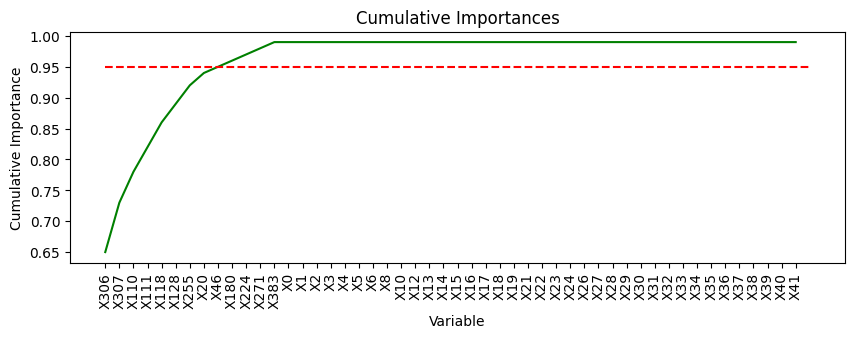

In [ ]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances][:50]
sorted_features = [importance[0] for importance in feature_importances][:50]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
x_values = list(range(len(importances)))
# Make a line graph
plt.plot(x_values[:50], cumulative_importances[:50], 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values[:50], sorted_features[:50], rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [ ]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 9


In [ ]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:9]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = X_train[:, important_indices]
important_test_features = X_test[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (3269, 9)
Important test features shape: (818, 9)


In [ ]:
important_feature_names

['X306', 'X307', 'X110', 'X111', 'X118', 'X128', 'X255', 'X20', 'X46']

In [ ]:
best.fit(important_train_features, y_train)

# предсказываем на тестовых данных
y_predict=best.predict(important_test_features)

# выбираем метрики которые будем оценивать
# в виде словаря
scoring = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}

# используем функцию кросс-валидации

scores = cross_validate(best, # какую модель тестируем
                        X_train, y_train, # на каких данных
                      scoring=scoring,  #на каких метриках
                      # как разбиваем данные при кросс-валидации
                      cv=ShuffleSplit(n_splits=5, random_state=42))


print('Результаты Кросс-валидации')
DF_cv_tree = pd.DataFrame(scores)
display(DF_cv_tree)


print('Ошибка на тестовых данных')
print('MSE: %.1f' % mean_squared_error(y_test,y_predict))
print('RMSE: %.1f' % mean_squared_error(y_test,y_predict,squared=False))

print('R2 : %.4f' %  r2_score(y_test,y_predict))

Результаты Кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.401068,0.004234,0.586520,-58.017062,-5.117591,-55.695877
1,0.348945,0.004131,0.593165,-60.630292,-5.103089,-70.074527
2,0.352301,0.004052,0.400914,-138.112191,-5.252192,-171.236499
3,0.346592,0.004086,0.577640,-66.669146,-5.554305,-41.077219
4,0.347089,0.004173,0.576145,-67.932840,-5.486489,-55.875897


Ошибка на тестовых данных
MSE: 63.0
RMSE: 7.9
R2 : 0.5939


Для некоторых моделей уменьшение количества признаков может улучшить результат, и поэтому это следует сделать.

для улучшения результат обязательно просмотреть набор данных и сгенерировать те функции, которые наиболее подходят для алгоритма случайного леса

In [ ]:
from sklearn.tree import export_graphviz

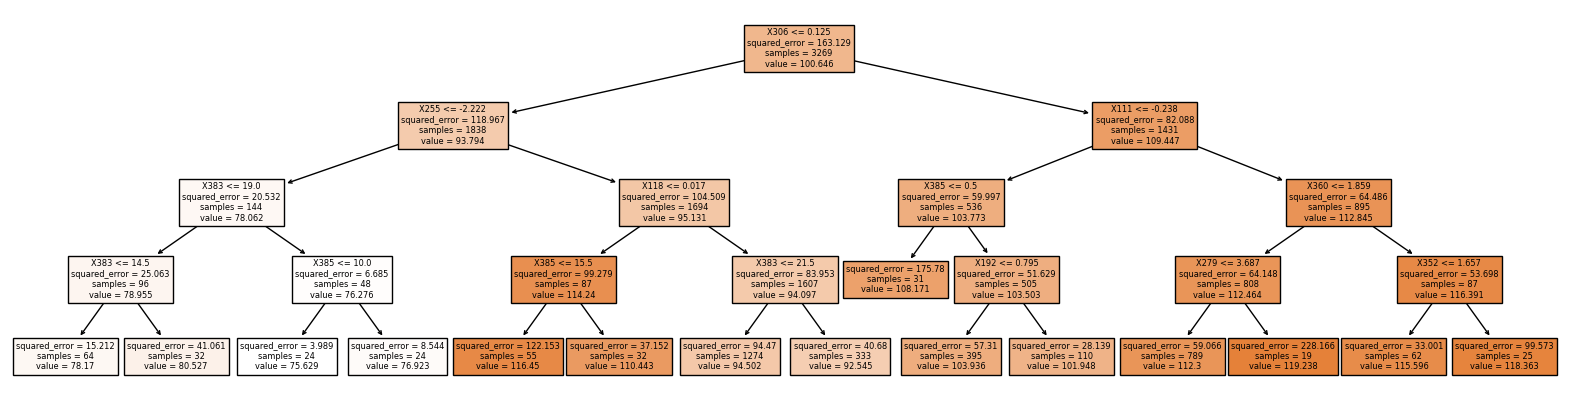

In [ ]:
from sklearn.tree import plot_tree
tree = DecisionTreeRegressor(random_state=1, min_samples_leaf=19, max_depth=4,)
tree.fit(X_train, y_train)

plt.figure(figsize=(20, 5))
plot_tree(tree, feature_names=X.columns, filled=True);
